<a href="https://colab.research.google.com/github/GIRISH2409/PM-using-logistic/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
train = pd.read_csv('/content/train.csv', index_col = 0 )
train.head(15)

,Date,Temperature,Humidity,Operator,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,01-01-2016 00:00,67,82,Operator1,291,1,1,1041,846,334,706,1086,256,1295,766,968,1185,1355,1842,90,No,2016,1,1,5,0,0,0
2,01-01-2016 01:00,68,77,Operator1,1180,1,1,1915,1194,637,1093,524,919,245,403,723,1446,719,748,91,No,2016,1,1,5,1,0,0
3,01-01-2016 02:00,64,76,Operator1,1406,1,1,511,1577,1121,1948,1882,1301,273,1927,1123,717,1518,1689,92,No,2016,1,1,5,2,0,0
4,01-01-2016 03:00,63,80,Operator1,550,1,1,1754,1834,1413,1151,945,1312,1494,1755,1434,502,1336,711,93,No,2016,1,1,5,3,0,0
5,01-01-2016 04:00,65,81,Operator1,1928,1,2,1326,1082,233,1441,1736,1033,1549,802,1819,1616,1507,507,94,No,2016,1,1,5,4,0,0
6,01-01-2016 05:00,67,84,Operator1,398,1,2,1901,1801,1153,1085,1547,2005,477,1217,1632,1324,1854,1739,95,No,2016,1,1,5,5,0,0
7,01-01-2016 06:00,67,83,Operator1,847,0,2,1849,1141,1609,982,1159,672,1128,663,1114,1838,290,1192,96,No,2016,1,1,5,6,0,0
8,01-01-2016 07:00,67,76,Operator1,1021,2,1,185,170,952,1183,1329,427,1638,850,379,1529,755,844,97,No,2016,1,1,5,7,0,0
9,01-01-2016 08:00,65,80,Operator3,1731,2,0,1424,1176,1223,621,647,369,239,1196,1944,1583,1630,237,98,No,2016,1,1,5,8,0,0


In [21]:
train.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.0
mean,64.031499,83.708412,1093.461354,1.488931,1.002277,1068.775206,1075.298166,1077.784187,1089.264263,1076.061607,1081.998229,1082.090955,1089.270841,1089.166856,1074.604428,1091.156357,1083.807717,210.322454,2016.0,5.920683,15.530550,4.001139,11.491461,0.0,0.0
std,2.885008,4.824696,535.519165,1.114934,0.813907,535.608830,533.723885,533.424014,537.138773,537.239794,531.265960,538.058616,534.776963,532.285078,535.351666,536.730228,536.976481,143.846069,0.0,3.115832,8.731102,1.999272,6.923853,0.0,0.0
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,62.000000,80.000000,633.000000,0.000000,0.000000,605.000000,604.000000,626.000000,625.000000,609.000000,634.000000,618.000000,628.000000,630.000000,605.000000,621.000000,616.000000,89.000000,2016.0,3.000000,8.000000,2.000000,5.000000,0.0,0.0
50%,64.000000,84.000000,1099.000000,2.000000,1.000000,1056.000000,1075.000000,1073.000000,1091.000000,1073.000000,1076.000000,1077.000000,1093.000000,1081.000000,1064.000000,1090.000000,1078.000000,192.000000,2016.0,6.000000,15.000000,4.000000,11.000000,0.0,0.0
75%,66.000000,87.000000,1556.000000,2.000000,2.000000,1530.000000,1542.000000,1541.000000,1561.000000,1540.000000,1527.000000,1547.000000,1548.000000,1551.000000,1537.000000,1564.000000,1552.000000,314.000000,2016.0,9.000000,23.000000,6.000000,17.000000,0.0,0.0
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,597.000000,2016.0,11.000000,31.000000,7.000000,23.000000,0.0,0.0


In [37]:
train.columns = ['Date', 'Temperature', 'Humidity', 'Operator', 'Measure1', 'Measure2',
           'Measure3', 'Measure4', 'Measure5', 'Measure6', 'Measure7', 'Measure8', 'Measure9', 'Measure10', 'Measure11', 'Measure12', 'Measure13', 'Measure14','Measure15', 'Hours_since_prev', 'Failure', 'Year', 'Month', 'Day', 'Week', 'Hour','Minute', 'Second']

In [22]:
train.describe()

,Temperature,Humidity,Measure1,Measure2,Measure3,Measure4,Measure5,Measure6,Measure7,Measure8,Measure9,Measure10,Measure11,Measure12,Measure13,Measure14,Measure15,Hours Since Previous Failure,?Date.year,?Date.month,?Date.day-of-month,?Date.day-of-week,?Date.hour,?Date.minute,?Date.second
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.000000,7905.000000,7905.000000,7905.000000,7905.0,7905.0
mean,64.031499,83.708412,1093.461354,1.488931,1.002277,1068.775206,1075.298166,1077.784187,1089.264263,1076.061607,1081.998229,1082.090955,1089.270841,1089.166856,1074.604428,1091.156357,1083.807717,210.322454,2016.0,5.920683,15.530550,4.001139,11.491461,0.0,0.0
std,2.885008,4.824696,535.519165,1.114934,0.813907,535.608830,533.723885,533.424014,537.138773,537.239794,531.265960,538.058616,534.776963,532.285078,535.351666,536.730228,536.976481,143.846069,0.0,3.115832,8.731102,1.999272,6.923853,0.0,0.0
min,5.000000,65.000000,155.000000,0.000000,0.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,1.000000,2016.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0
25%,62.000000,80.000000,633.000000,0.000000,0.000000,605.000000,604.000000,626.000000,625.000000,609.000000,634.000000,618.000000,628.000000,630.000000,605.000000,621.000000,616.000000,89.000000,2016.0,3.000000,8.000000,2.000000,5.000000,0.0,0.0
50%,64.000000,84.000000,1099.000000,2.000000,1.000000,1056.000000,1075.000000,1073.000000,1091.000000,1073.000000,1076.000000,1077.000000,1093.000000,1081.000000,1064.000000,1090.000000,1078.000000,192.000000,2016.0,6.000000,15.000000,4.000000,11.000000,0.0,0.0
75%,66.000000,87.000000,1556.000000,2.000000,2.000000,1530.000000,1542.000000,1541.000000,1561.000000,1540.000000,1527.000000,1547.000000,1548.000000,1551.000000,1537.000000,1564.000000,1552.000000,314.000000,2016.0,9.000000,23.000000,6.000000,17.000000,0.0,0.0
max,78.000000,122.000000,2011.000000,3.000000,2.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,597.000000,2016.0,11.000000,31.000000,7.000000,23.000000,0.0,0.0


In [23]:
train.dtypes

Date                            object
Temperature                      int64
Humidity                         int64
Operator                        object
Measure1                         int64
Measure2                         int64
Measure3                         int64
Measure4                         int64
Measure5                         int64
Measure6                         int64
Measure7                         int64
Measure8                         int64
Measure9                         int64
Measure10                        int64
Measure11                        int64
Measure12                        int64
Measure13                        int64
Measure14                        int64
Measure15                        int64
Hours Since Previous Failure     int64
Failure                         object
?Date.year                       int64
?Date.month                      int64
?Date.day-of-month               int64
?Date.day-of-week                int64
?Date.hour               

In [24]:
train['Failure'].value_counts()

No     7830
Yes      75
Name: Failure, dtype: int64

In [ ]:
train['Failure'] = train['Failure'].astype('category')
train['Failure'] = train['Failure'].cat.codes


In [25]:
train.dtypes

Date                            object
Temperature                      int64
Humidity                         int64
Operator                        object
Measure1                         int64
Measure2                         int64
Measure3                         int64
Measure4                         int64
Measure5                         int64
Measure6                         int64
Measure7                         int64
Measure8                         int64
Measure9                         int64
Measure10                        int64
Measure11                        int64
Measure12                        int64
Measure13                        int64
Measure14                        int64
Measure15                        int64
Hours Since Previous Failure     int64
Failure                         object
?Date.year                       int64
?Date.month                      int64
?Date.day-of-month               int64
?Date.day-of-week                int64
?Date.hour               

In [26]:
train['Failure'].value_counts()

No     7830
Yes      75
Name: Failure, dtype: int64

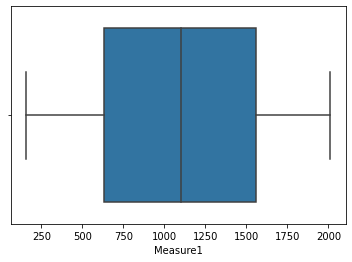

In [36]:
sns.boxplot(x=train['Measure1'])

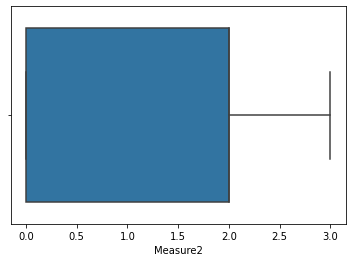

In [27]:
sns.boxplot(x=train['Measure2'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


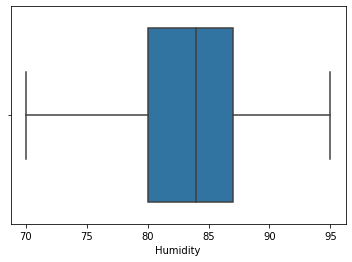

In [28]:

train['Humidity'][train['Humidity']< 70] = 70
train['Humidity'][train['Humidity']>95] = 95
sns.boxplot(x=train['Humidity'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


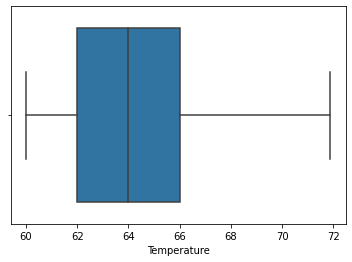

In [29]:
train['Temperature'][train['Temperature']<60] = 60
train['Temperature'][train['Temperature']>71.875] = 71.875
sns.boxplot(x = train['Temperature'])

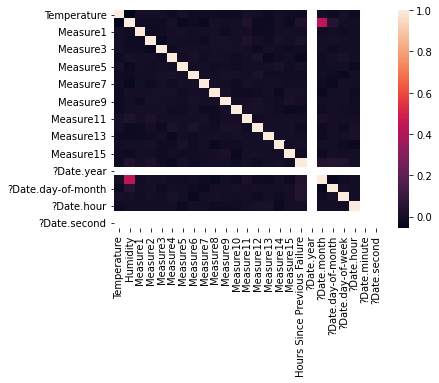

In [30]:
sns.heatmap(train.corr())

In [38]:
X = train[['Temperature', 'Humidity', 'Hours_since_prev', 'Year', 'Month', 'Day', 'Week']]
y = train['Failure']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
from sklearn.metrics import accuracy_score

In [39]:

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [40]:

predicted_classes = model.predict(X_test)
predicted_classes

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [41]:
predictions = pd.Series(predicted_classes)

In [44]:
parameters = model.coef_

In [45]:
print(parameters)

[[ 0.69549166 -0.37527331 -0.00465494 -0.01064639  0.28602946 -0.03670515
   0.04351306]]


In [43]:
from sklearn import metrics

In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, predicted_classes))
print('MSE:', metrics.mean_squared_error(y_test, predicted_classes))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted_classes)))

ValueError: ignored

In [47]:
train.to_csv

<bound method NDFrame.to_csv of                   Date  Temperature  Humidity  ... Hour  Minute  Second
ID                                             ...                     
1     01-01-2016 00:00         67.0        82  ...    0       0       0
2     01-01-2016 01:00         68.0        77  ...    1       0       0
3     01-01-2016 02:00         64.0        76  ...    2       0       0
4     01-01-2016 03:00         63.0        80  ...    3       0       0
5     01-01-2016 04:00         65.0        81  ...    4       0       0
...                ...          ...       ...  ...  ...     ...     ...
7901  25-11-2016 04:00         60.0        81  ...    4       0       0
7902  25-11-2016 05:00         63.0        81  ...    5       0       0
7903  25-11-2016 06:00         60.0        83  ...    6       0       0
7904  25-11-2016 07:00         63.0        80  ...    7       0       0
7905  25-11-2016 08:00         67.0        77  ...    8       0       0

[7905 rows x 28 columns]>

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted_classes)

array([[5480,    2],
       [  20,   32]])

In [59]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, predicted_classes))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00      5482
         Yes       0.94      0.62      0.74        52

    accuracy                           1.00      5534
   macro avg       0.97      0.81      0.87      5534
weighted avg       1.00      1.00      1.00      5534



In [61]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,predicted_classes)

0.9960245753523672

In [63]:
X_test

,Temperature,Humidity,Hours_since_prev,Year,Month,Day,Week
ID,,,,,,,
6974,61.0,82,83,2016,10,17,1
2355,63.0,87,522,2016,4,8,5
3091,64.0,80,273,2016,5,8,7
5893,62.0,83,261,2016,9,2,5
6232,61.0,88,214,2016,9,16,5
...,...,...,...,...,...,...,...
3024,60.0,81,206,2016,5,5,4
5632,64.0,83,513,2016,8,22,1
7229,60.0,89,338,2016,10,28,5


In [66]:
model.predict([[61,82,83,2016,10,17,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array(['No'], dtype=object)

In [67]:
predicted_classes

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [68]:
predictions


0       No
1       No
2       No
3       No
4       No
        ..
5529    No
5530    No
5531    No
5532    No
5533    No
Length: 5534, dtype: object